# 13-1. 들어가며

시계열 예측 -> 통계적 기법 -> ARIMA(Auto-regressive Integrated Moving Average)  

학습 목표  
시계열 데이터의 특성과 안정적(Stationary) 시계열의 개념을 이해한다.  
ARIMA 모델을 구성하는 AR, MA, Diffencing의 개념을 이해하고 간단한 시계열 데이터에 적용해 본다.  
실제 주식 데이터에 ARIMA를 적용해서 예측 정확도를 확인해 본다.  
  
목차  
시계열 예측이란  
미래를 예측한다는 것은 가능할까?  
Stationary한 시계열 데이터란?  
시계열 데이터 사례분석  
Stationary 여부를 체크하는 통계적 방법  
ARIMA 시계열 예측  
시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?  
ARIMA 모델의 개념  
ARIMA 모델 훈련과 추론  
프로젝트 : 주식 예측에 도전해 보자  

# 13-2. 시계열 예측이란(1) 미래를 예측한다는 것은 가능할까?

날짜-가격 형태로 날짜순으로 모아둔 데이터 -> can be 훌륭한 시계열 데이터   
날짜가 인덱스(index) 역할  
  
안정적 = 시계열 데이터의 통계적 특성이 변하지 않는다 = 시간의 변화에 무관하게 일정한 프로세스가 존재한다  

**Q2. 유가 변화 예측을 위해 이전의 유가 변화 데이터만 활용하지 않고 다른 데이터를 추가로 활용하는 이유는 무엇일까요?**  
국제 유가는 국가 간 분쟁, 경제 호황/불황 등 다양한 외부적 요소에 의해 가격을 결정하는 수요-공급 균형점이 변화하므로,  
외부적 요인을 추가로 고려할 수 있는 보조 데이터의 활용이 정확한 예측에 도움이 됩니다.

# 13-3. 시계열 예측이란(2) Stationary한 시계열 데이터

**Q3. 안정적인 시계열에서 시간의 추이와 관계없이 일정해야 하는 통계적 특성 세 가지는 무엇인가요?**  
>평균, 분산, 공분산(그러나 정확히는 자기공분산-autocovariance이라고 해야 함)  

분산(Variance), 공분산(Covariance), 상관계수(Correlation), 자기공분산(Autocovariance), 자기상관계수(Autocorrelation)이라는 개념  


예를 들어 직전 5년 치 판매량 X(t-4), X(t-3), X(t-2), X(t-1), X(t)를 가지고 X(t+1)이 얼마일지 예측을 해보고 싶다고 합시다.  
이 예측이 의미가 있으려면 중요한 것은 t에 무관하게 이 예측이 맞아떨어져야 한다  
2010의 데이터로 2011를 정확하게 예측하는 모델이라면  
2020의 데이터로 2021도 정확하게 예측할 수 있어야 한다  
그러려면 t에 무관하게 X(t-4), X(t-3), X(t-2), X(t-1), X(t)의 평균과 분산이 일정 범위 안에 있어야 합니다.  
또한 X(t-h)와 X(t)는 t에 무관하게 h에 대해서만 달라지는 일정한 상관도를 가져야

# 13-4. 시계열 예측이란(3) 시계열 데이터 사례분석

In [1]:
! mkdir -p ~/aiffel/stock_prediction/data

In [2]:
! wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

--2021-03-03 10:07:28--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘daily-min-temperatures.csv’

daily-min-temperatu 100%[===================>]  66.33K  --.-KB/s    in 0.04s   

2021-03-03 10:07:28 (1.78 MB/s) - ‘daily-min-temperatures.csv’ saved [67921/67921]



In [3]:
! wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2021-03-03 10:07:28--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2021-03-03 10:07:28 (67.9 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [4]:
! mv daily-min-temperatures.csv airline-passengers.csv ~/aiffel/stock_prediction/data

## 시계열(Time Series) 생성

Daily Minimum Temperatures in Melbourn 데이터 다루기  
-> 온도 변화이니까 안정성이 있을까?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print('슝=3')

슝=3


In [21]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


읽어 들인 데이터 파일은 Pandas를 통해 2개의 컬럼을 가진 DataFrame으로 변환  
아직 시계열의 데이터 구조 **아님**

In [33]:
# 이번에는 Date를 index_colum로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
# df = pd.read_csv(dataset_filepath, index_col='Date') # 이걸로 하면 그래프가 안그려지던지 엄청 느리게 그려짐.와
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [34]:
# type : DataFrame -> Series(시계열) 바꾸기  
ts1 = df['Temp']
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

## 시계열 안정성의 정성적 분석

안정성(Stationarity) 여부를 확인

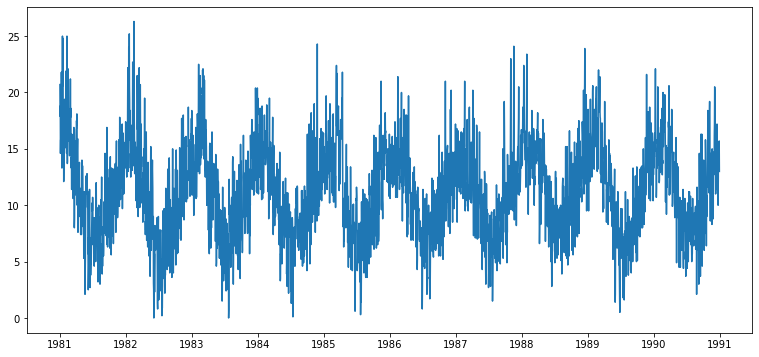

In [35]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

하지만 분석에 들어가기 전에 잊지 말아야 할 단계가 하나 있습니다. 바로 결측치 유무 확인입니다.

In [36]:
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

만약 결측치가 있다면,  
1)결측치가 있는 데이터를 모두 삭제(drop)하거나,  
2)결측치 양옆의 값들을 이용해서 적절히 보간(interpolate) 대입해 주는 방법이 있습니다.   
2와 4 사이 데이터가 NaN이라면 이 값을 3으로 채우는 방식인 거죠.  
이번 경우라면 시간을 index로 가지는 시계열 데이터이므로 삭제하는 것보다는 보간하는 방법을 선택하겠습니다.  
결측지 보간은 아래에 

Series([], Name: Temp, dtype: float64)


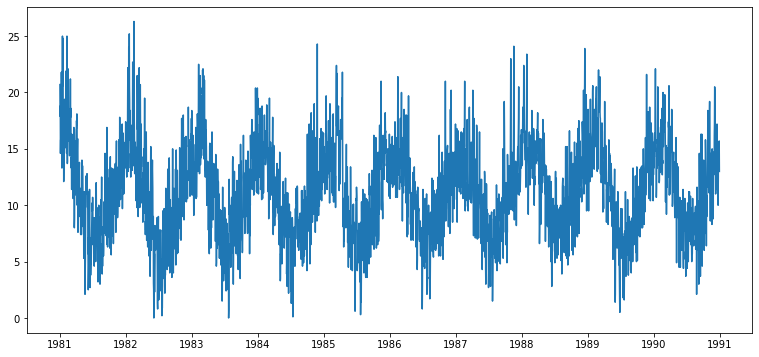

In [37]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

시계열 데이터의 통계적 특성을 좀 더 명료하게 시각화 해보자  
일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수  
현재 타임스텝부터 window에 주어진 타임스텝 이전 사이 구간의 평균(rolling mean, 이동평균)과 표준편차(rolling std, 이동표준편차)를 원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있을 것입니다.  

window란 ???

In [8]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


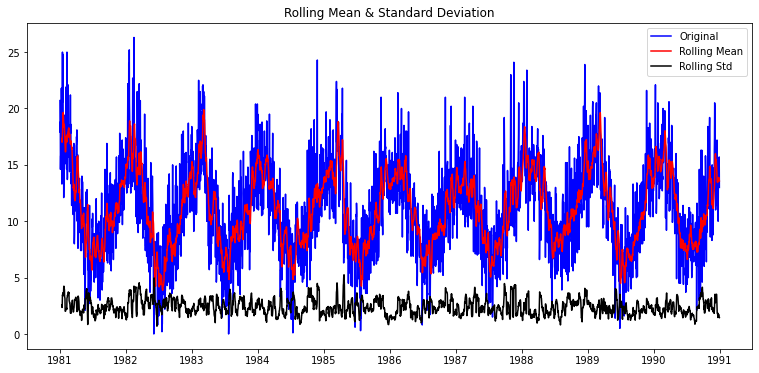

In [39]:
plot_rolling_statistics(ts1, window=12)

## 다른 데이터에 대해서도 비교해 보자.

International airline passengers 데이터셋  
월별 항공 승객 수(천명 단위)의 시계열 데이터  

In [40]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


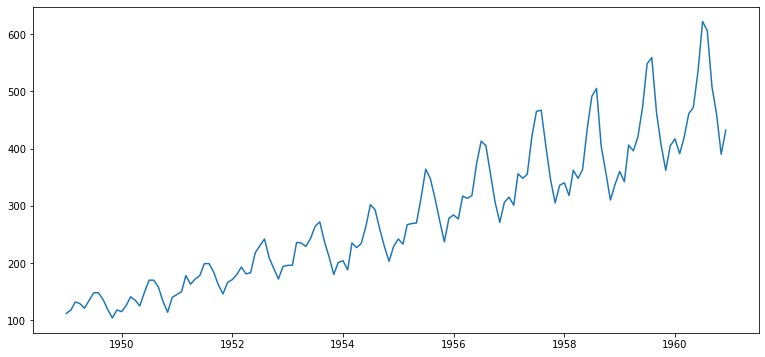

In [41]:
ts2 = df['Passengers']
plt.plot(ts2)

시간의 추이에 따라 시계열의 평균과 분산이 지속적으로 커지는 패턴  
 rolling statistics를 추가해서 시각화

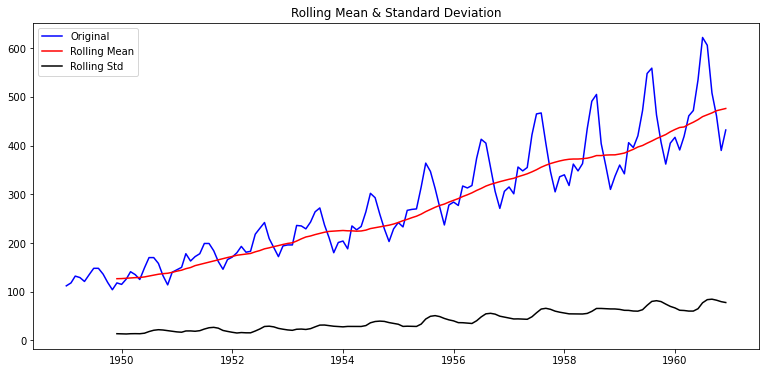

In [42]:
plot_rolling_statistics(ts2, window=12)

이후 스텝들에는 이런 불안정적(Non-Stationary) 시계열 데이터에 대한 시계열 분석 기법을 다루어 볼 것  
  
위와 같이 우리는 시계열 데이터의 안정성을 시각화 방법을 통해 정성적으로 분석해 볼 수 있다  
하지만 시계열 데이터의 안정성을 평가하는 데는 보다 정량적인 방법이 있을 것 같습니다.

# 13-5. 시계열 예측이란(4) Stationary 여부를 체크하는 통계적 방법

## Augmented Dickey-Fuller Test (ADF Test)

요거는 시계열 데이터의 안정성을 테스트하는 통계적 방법  
주어진 시계열 데이터가 안정적이지 않다라는 귀무가설(Null Hypothesis)를 세운 후,   
통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에 이 시계열 데이터가 안정적이다라는 대립가설(Alternative Hypothesis)을 채택한다  
  
ADF Test의 세부 알고리즘은 생략하고, statsmodels 패키지에서 제공하는 adfuller 메소드를 이용해 손쉽게 ADF Test의 결과를 이용할 것  
통계적 가설 검정의 기본 개념을 이루는 p-value  
**Q9. p-value(유의확률)이란 어떤 의미인가요?**  
>귀무가설이 맞다고 가정할 때 얻은 결과보다 극단적인 결과가 실제로 관측될 확률  
내가 귀무가설이 틀리다고 주장할때, 내 말이 틀릴 확률  



## statsmodels 패키지와 adfuller 메소드

statsmodels 패키지는 R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지  
아래는 statsmodels 패키지에서 제공하는 adfuller 메소드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드

In [17]:
! pip install statsmodels

In [9]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    # 아래 index의 값들은 정해져 있고 정해진 값들에 알맞은 인덱스를 써줘야 한다 
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


In [46]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 0에 가깝게 나타났습니다.  
따라서 이 귀무가설은 기각되고, 이 시계열은 안정적 시계열이라는 대립가설이 채택됩니다.

In [20]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


시계열이 안정적이지 않다는 귀무가설은 p-value가 거의 1에 가깝게 나타났습니다.  
이것이 바로 이 귀무가설이 옳다는 직접적인 증거가 되지는 않지만, 적어도 이 귀무가설을 기각할 수는 없게 되었으므로  
이 시계열이 안정적인 시계열이라고 말할 수는 없습니다.

# 13-6. 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?

안정적이지 않은 시계열을 분석하려면 이것을 안정적인 시계열로 바꿔야 함  
두 가지 방법  
>정성적인 분석을 통해 보다 안정적(starionary)인 특성을 가지도록 기존의 시계열 데이터를 가공/변형하는 시도  
시계열 분해(Time series decomposition)라는 기법을 적용

## 보다 Stationary한 시계열로 가공해 가기

### 로그함수 변환

시간 추이에 따라 분산이 점점 커지고 있다 -> 로그함수로 변환을 해주는 것이 도움 됨

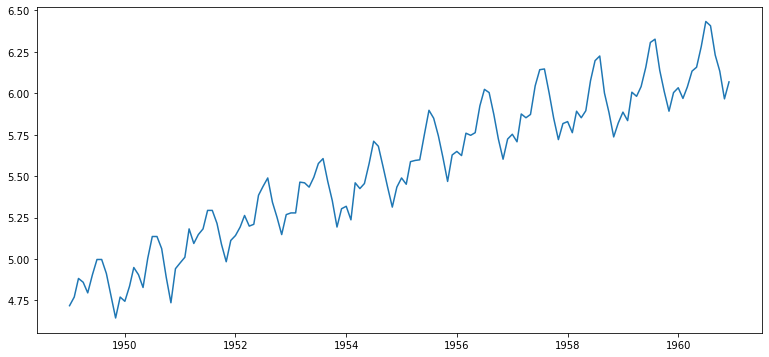

In [21]:
ts_log = np.log(ts2)
plt.plot(ts_log)

In [47]:
ts_log

Date
2005-09-29     9.111624
2005-09-30     9.113829
2005-10-03     9.113829
2005-10-04     9.122601
2005-10-05     9.130214
                ...    
2021-02-24    11.194097
2021-02-25    11.213171
2021-02-26    11.195471
2021-03-02    11.199584
2021-03-03    11.199584
Name: Close, Length: 3823, dtype: float64

In [22]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value가 0.42로 무려 절반 이상 줄어듬 -> 정성적으로도 시간 추이에 따른 분산이 일정해진 것  
가장 두드러지는 문제점 : 시간 추이에 따라 평균이 계속 증가한다는 점

### Moving average 제거 - 추세(Trend) 상쇄하기

시간 추이에 따라 나타나는 평균값 변화 = 추세(trend)  
이 변화량을 제거해 주려면 거꾸로 Moving Average, 즉 rolling mean을 구해서 ts_log에서 빼

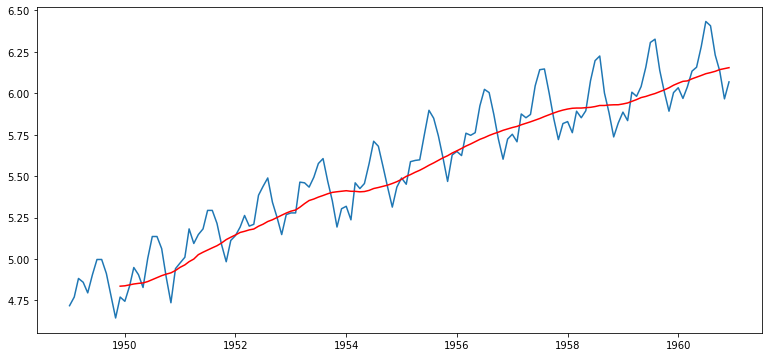

In [23]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [24]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

In [25]:
# 생긴 결측치 제거  
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

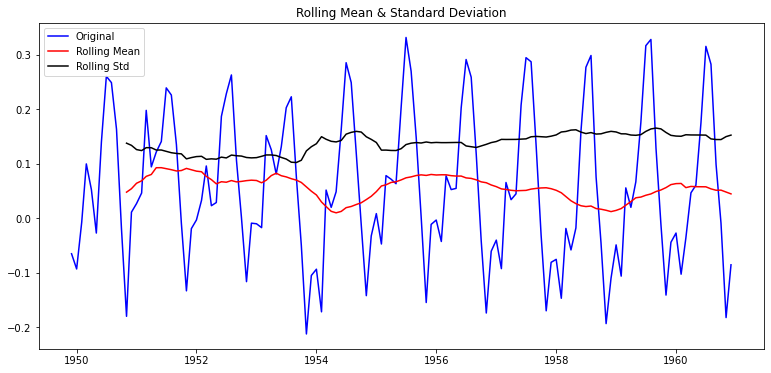

In [26]:
# 정성적 분석
plot_rolling_statistics(ts_log_moving_avg)

In [27]:
# 정량적 분석 
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


p-value가 0.02 수준으로 됨 -> stationary하다  
   
문제점 하나 -> Moving Average를 계산하는 window=12로 정확하게 지정해 주어야 한다는 점  
window=6을 적용하면 어떤 결과가 나올까요?

In [28]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

슝=3


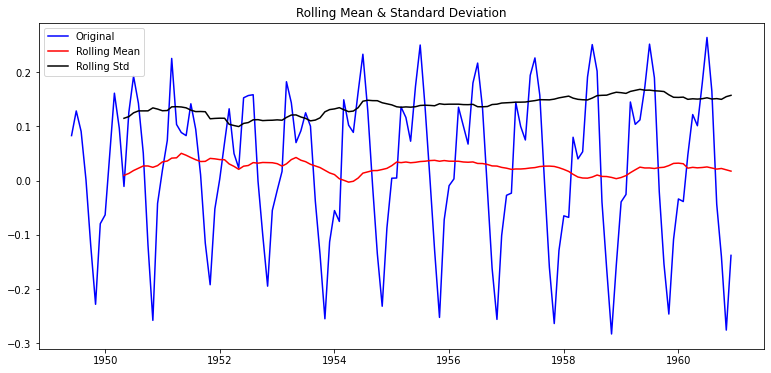

In [29]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [30]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


정성적으로 분석해서는 window=12일 때와 별 차이를 느낄수 없지만  
p-value는 0.18 수준 -> 비안정적임   
  
월 단위로 발생하는 시계열 -> window=12 로도 추측 가능  
이렇게 중요한 것이니께 moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기를 결정하는 것이 매우 중요하다는 것을 기억
  
trend를 제거 했는데도 마음에 걸리는 부분  


### 차분(Differencing) - 계절성(Seasonality) 상쇄하기

Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 패턴이 파악되지 않은 주기적 변화는 예측에 방해가 되는 불안정성 요소  
이건 Moving Average 제거로는 상쇄되지 않는 효과  
계절적, 주기적 패턴을 계절성(Seasonality)라고 함  
  
이런 패턴을 상쇄하기 위해 효과적인 방법 => 차분(Differencing)  
시계열을 한 스텝 앞으로 시프트한 시계열을 원래 시계열에 빼 주는 방법  
남은 것 = 현재 스텝 값 - 직전 스텝 값  =  정확히 이번 스텝에서 발생한 변화량을 의미  


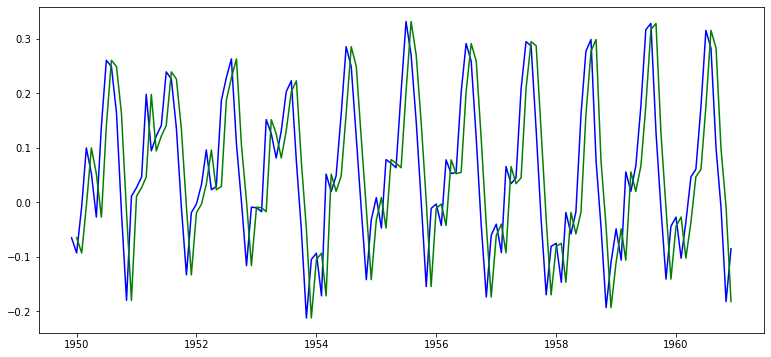

In [31]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

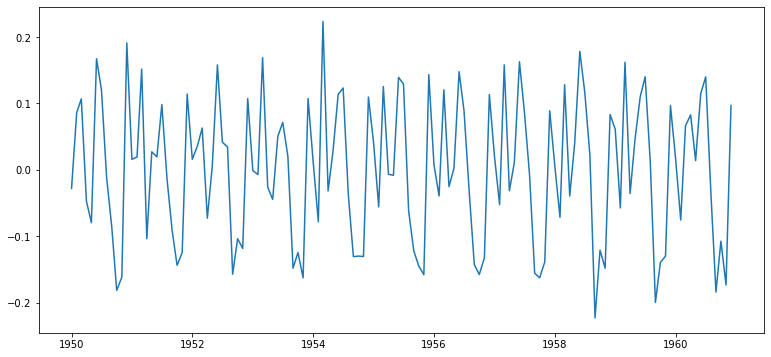

In [32]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

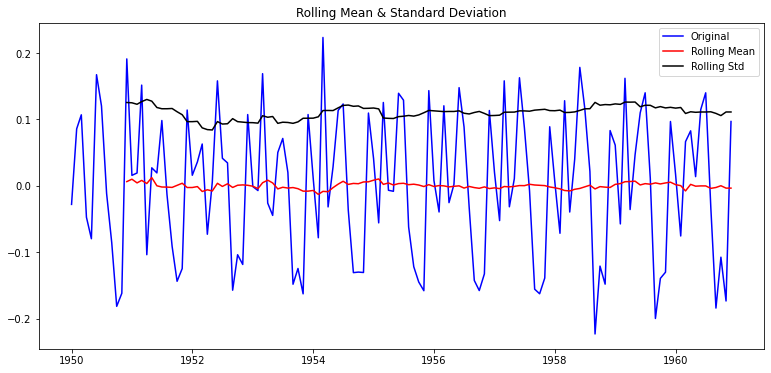

In [33]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [34]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


1차 차분(1st order differencing)을 적용 -> p-value가 이전의 10% 정도까지로 줌  
데이터에 따라서는 2차 차분(2nd order differencing, 차분의 차분), 3차 차분(3rd order differencing, 2차 차분의 차분)을 적용하면 더욱 p-value를 낮출 수 있을지도

## 시계열 분해(Time series decomposition)

seasonal_decompose 메소드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있다

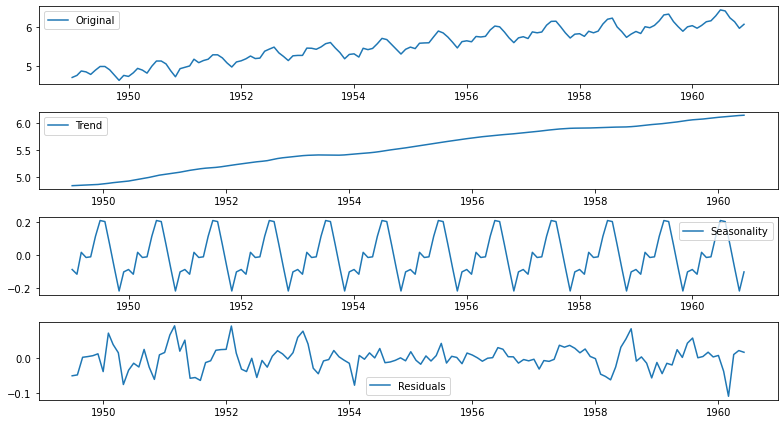

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (11,6) # 요 코드는 또 뭐다냥
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout() # 약간 정리하는 코드???

Original - Trend - Seasonality = Residual  
Trend + Seasonality + Residual = Original  
Residual에 대해 안정성 여부

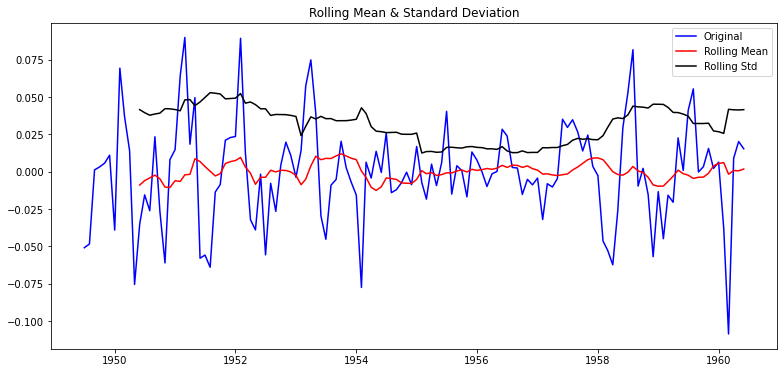

In [36]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [37]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


# 13-7. ARIMA 모델의 개념

## ARIMA 모델의 정의

ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average)가 합쳐진 모델  


### AR(자기회귀, Autoregressive)

![](https://aiffelstaticprd.blob.core.windows.net/media/images/E-16-2_nh8iD9A.max-800x600.png)

이해는 안되지만 일단 옮겨 본다  
- 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 AR로 모델링하는 관점이라고 볼 수 있습니다.  


### MA(이동평균, Moving Average)

![](https://aiffelstaticprd.blob.core.windows.net/media/images/E-16-3.max-800x600.png)

- 주식값은 항상 최근의 증감 패턴이 지속될 것이라고 예측하는 관점이 바로 주식 시계열을 MA로 모델링하는 관점이라고 볼 수 있습니다

### I (차분누적, Integration)

- I는 일반적인 시계열에서 Seasonality에 해당하는 부분을 모델링한다고 볼 수 있습니다.  
- 차분누적은 Yt이 이전 데이터와 d차 차분의 누적(integration) 합이라고 보는 모델입니다.  
  
'오늘은 주식이 올라서 균형을 맞추겠지?'라는 AR 형태의 기대 &  '어제 떨어졌으니 추세적으로 계속 떨어지지 않을까?'라는 MA 형태  
ARIMA는 이 두 모델 사이에서 적정 가중치를 찾아간다  


## ARIMA 모델의 모수 p, q, d

모수(parameter) 3가지    
>자기회귀 모형(AR)의 시차를 의미하는 p  
차분(diffdrence) 횟수를 의미하는 d  
이동평균 모형(MA)의 시차를 의미하는 q  
  
통상적으로 p + q < 2, p * q = 0 인 값들을 사용 -> p 나 q 중 하나의 값이 0이라는 뜻  
=> 시계열 데이터는 자기회귀 모형(AR)이나 이동평균 모형(MA) 중 하나의 경향만을 강하게 띠기 때문  
***
ARIMA(p,d,q) 모델의 모수를 결정하는 방법  
  
이제부터 설명이 매우 어렵다  
결론부터 이야기하면 p,d,q는 ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function)을 통해 결정할 수 있다  
AutoCorrelation은  
>우리가 맨 첫 스텝에서 만났던 바로 개념 중 하나인 자기상관계수와 같은 것   
 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수  
 
PACF(Partial Autocorrelation Function)은  
>다른 관측치의 영향력을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수  
  
  
statsmodels에서 제공하는 ACF와 PACF 플로팅 기능을 사용할 것

<function matplotlib.pyplot.show(close=None, block=None)>

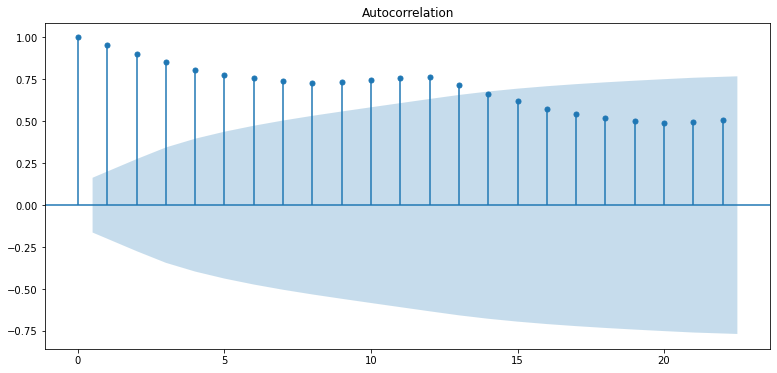

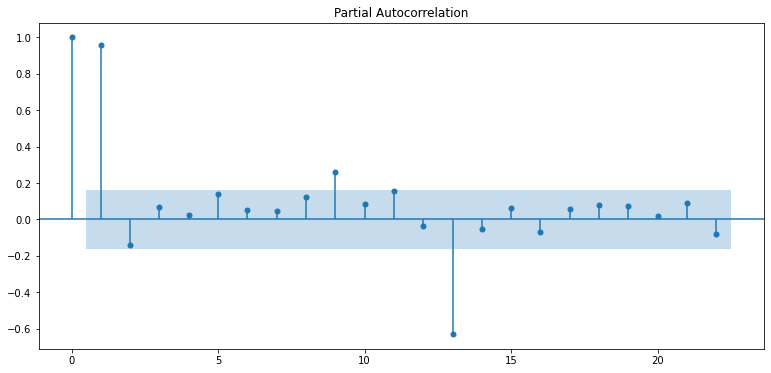

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)  # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show

![](https://aiffelstaticprd.blob.core.windows.net/media/images/E-16-4.max-800x600.png)

^ACF를 통해 MA 모델의 시차 q를 결정하고, PACF를 통해 AR 모델의 시차 p를 결정할 수 있음을 통계학적으로 설명하는 아티클에서 요약결론 부분  
  
ACF는 점차적으로 감소하고 있어서 AR(1) 모델(???)에 유사한 형태를 보이고 있습니다. q에 대해서는 적합한 값이 없어 보입니다.   
MA를 고려할 필요가 없다면 q=0으로 둘 수 있습니다.   
   
PACF 그래프를 볼 때 p=1이 매우 적합한 것 같습니다.  
p가 2 이상인 구간에서 PACF는 거의 0에 가까워지고 있기 때문입니다.   
PACF가 0이라는 의미는 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0 = 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 뜻  

d차 차분을 구해 보고 이때 시계열이 안정된 상태인지를 확인하기  

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


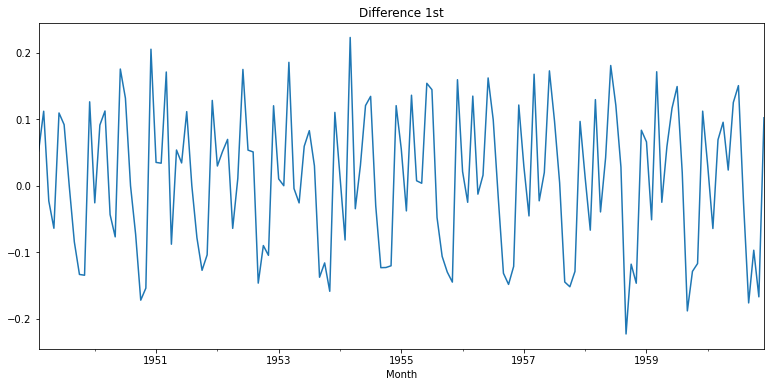

In [41]:
# 1차 차분  
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title ='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


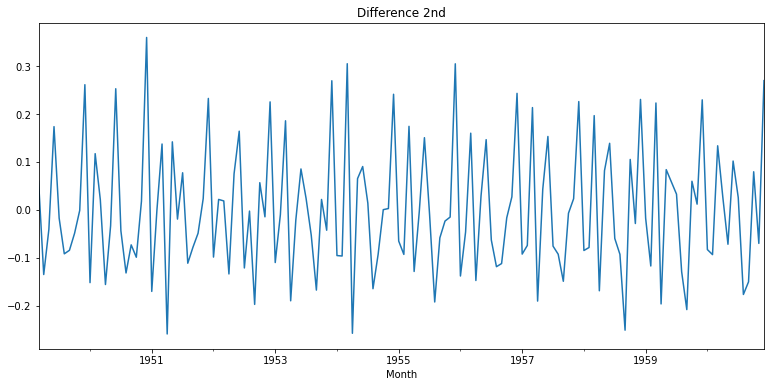

In [42]:
# 2차 차분 
diff_2=diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

## 학습데이터 분리

분리 비율은 학습과 테스트에 9:1로  
시계열 예측이니만큼 가장 나중 데이터를 테스트용으로 사용하는 것이 타당  

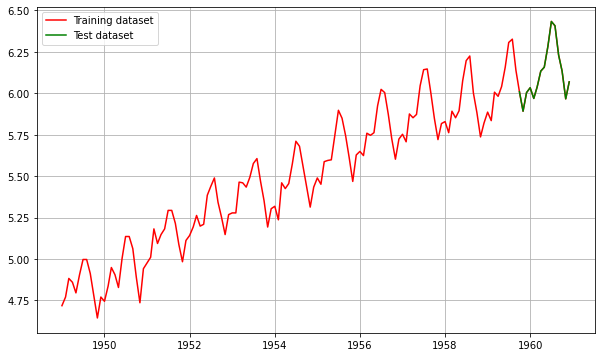

In [44]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)],ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='Training dataset')
plt.plot(test_data, c='g', label='Test dataset')
plt.legend()

In [46]:
print(ts_log[:2])
print('-----------------------')
print(train_data.shape)
print(test_data.shape)
print('-----------------------')
print(type(train_data))

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
-----------------------
(129,)
(15,)
-----------------------
<class 'pandas.core.series.Series'>


# 13-8. ARIMA 모델 훈련과 추론

## ARIMA 모델 훈련

In [47]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1,1,0))
fitted_m = model.fit(disp=-1)
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  128
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 108.023
Method:                       css-mle   S.D. of innovations              0.104
Date:                Wed, 03 Mar 2021   AIC                           -210.046
Time:                        10:36:08   BIC                           -201.490
Sample:                    02-01-1949   HQIC                          -206.570
                         - 09-01-1959                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0108      0.011      0.972      0.331      -0.011       0.033
ar.L1.D.Passengers     0.1754      0.088      1.994      0.046       0.003       0.348
                    

/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency inf

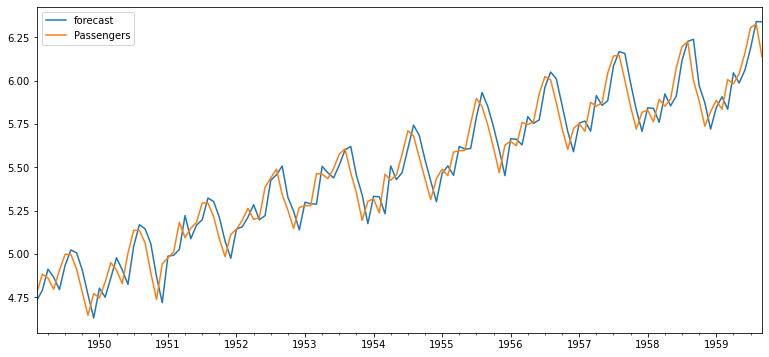

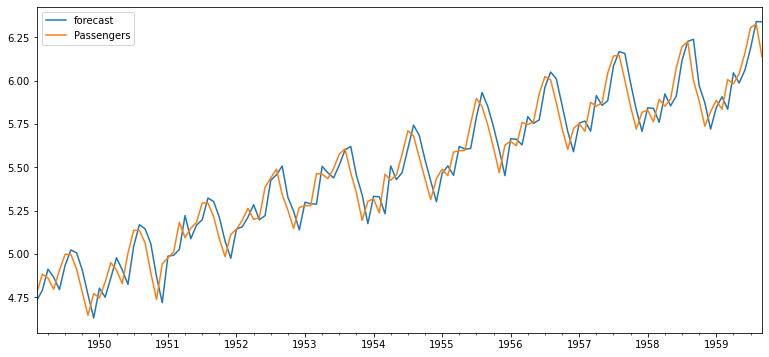

In [49]:
fitted_m.plot_predict() # ARIMA 모델이 잘 fit하는지 시각적으로 확인

^ 왜 그래프 2개 나오지 ???  
  
forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측

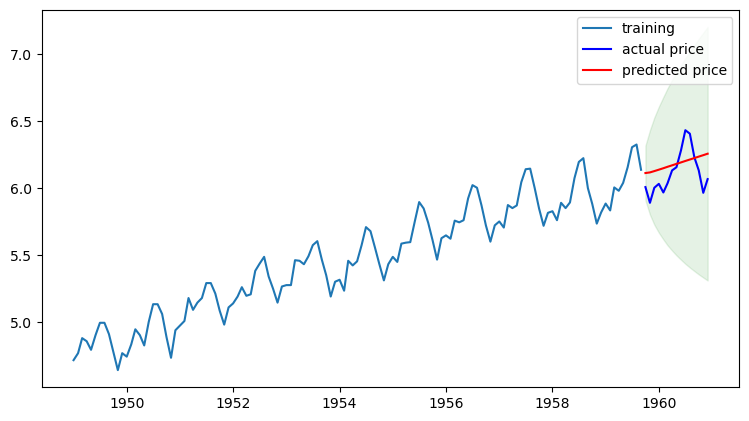

In [57]:
# Forecast : 결과가 fc에 담깁니다.
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05) # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index) # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100) # dpi 값을 활용해서 inch 와 pixel의 변환을, dot per inch
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r', label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='g', alpha=.10) # ??? 잘 이해안감
plt.legend()
plt.show()

최종적인 모델의 오차율을 계산하려면, 그동안 로그 변환된 시계열을 사용해 왔던 것을 모두 지수 변환하여 원본의 스케일로 계산해야 타당합니다.   np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산해 보았습니다.

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import math 

mse = mean_squared_error(np.exp(test_data),np.exp(fc))
print('MSE :', mse)

mae = mean_absolute_error(np.exp(test_data),np.exp(fc))
print('MAE :', mae)

rmse = math.sqrt(mse)
print('RMSE :', rmse)  

mape = np.mean(np.abs(np.exp(fc)-np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE : {:.2f}%'.format(mape*100))

MSE : 5409.549368507227
MAE : 63.13691715511791
RMSE : 73.5496388060963
MAPE : 14.08%


14% 정도의 오차율  
적당한 모수를 찾을 수 있다면 개선의 여지가 있을 수도  
q=8을 줄 경우 MAPE가 10% 정도로 내려갑니다.   
q=12를 쓸 수 있다면 더욱 좋을 거라는 예상이 되지만 이번 경우에는 데이터셋이 너무 작아 쓸 수 없었습니다.


# 13-9. 프로젝트 : 주식 예측에 도전해 보자

![](https://aiffelstaticprd.blob.core.windows.net/media/images/E-16-5.max-800x600.png)  
다운로드 후에  

In [58]:
! mv ~/다운로드/005935.KS.csv ~/aiffel/stock_prediction/data

mv: cannot stat '/home/aiffel-dj35/다운로드/005935.KS.csv': No such file or directory


In [61]:
! mv ~/Downloads/005935.KS.csv ~/aiffel/stock_prediction/data

## STEP 1 : 시계열 데이터 준비

- 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume  
- 날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있지만, 우리는 Close만 사용하겠습니다. (주식 시장은 정해진 시간 동안만 거래가 가능합니다. 종가란 하루의 장이 마감하였을 때의 가격입니다.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Time Series 생성
# [[YOUR CODE]]
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/005935.KS.csv'
ts = pd.read_csv(dataset_filepath)
print(type(ts))
ts.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,9080.0,9280.0,9000.0,9060.0,6560.614258,4472150.0
1,2005-09-30,9080.0,9200.0,8920.0,9080.0,6575.100586,1897950.0
2,2005-10-03,9080.0,9080.0,9080.0,9080.0,6575.100586,0.0
3,2005-10-04,9070.0,9290.0,9070.0,9160.0,6633.028809,3475500.0
4,2005-10-05,9290.0,9430.0,9160.0,9230.0,6683.719727,3276650.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005935.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close'] # 종가

ts.head()

Date
2005-09-29    9060.0
2005-09-30    9080.0
2005-10-03    9080.0
2005-10-04    9160.0
2005-10-05    9230.0
Name: Close, dtype: float64

In [3]:
ts.tail()

Date
2021-02-24    72700.0
2021-02-25    74100.0
2021-02-26    72800.0
2021-03-02    73100.0
2021-03-03    73100.0
Name: Close, dtype: float64

## STEP 2 : 각종 전처리 수행

In [4]:
# 결측치 처리
ts=ts.interpolate(method='time')

ts[ts.isna()] # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

In [5]:
# 로그 변환 
ts_log = np.log(ts)
ts_log

Date
2005-09-29     9.111624
2005-09-30     9.113829
2005-10-03     9.113829
2005-10-04     9.122601
2005-10-05     9.130214
                ...    
2021-02-24    11.194097
2021-02-25    11.213171
2021-02-26    11.195471
2021-03-02    11.199584
2021-03-03    11.199584
Name: Close, Length: 3823, dtype: float64

## STEP 3 : 시계열 안정성 분석

-정성적 그래프 분석  
-정량적 Augmented Dicky-Fuller Test  
-시계열 분해(Time Series Decomposition)  
-Residual 안정성 확인  

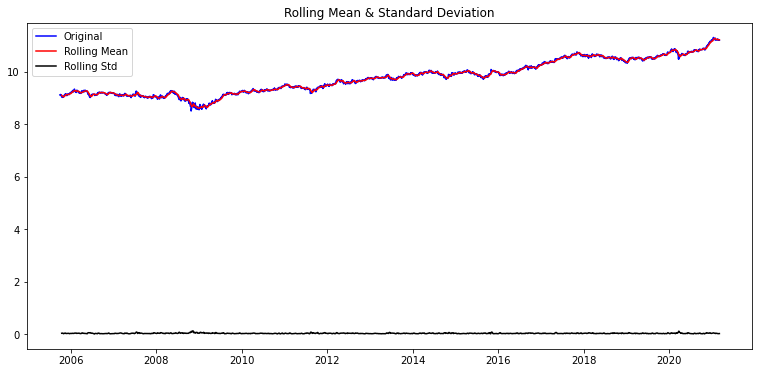

Results of Dickey-Fuller Test:
Test Statistic                    0.552394
p-value                           0.986382
#Lags Used                        8.000000
Number of Observations Used    3814.000000
Critical Value (1%)              -3.432066
Critical Value (5%)              -2.862298
Critical Value (10%)             -2.567174
dtype: float64


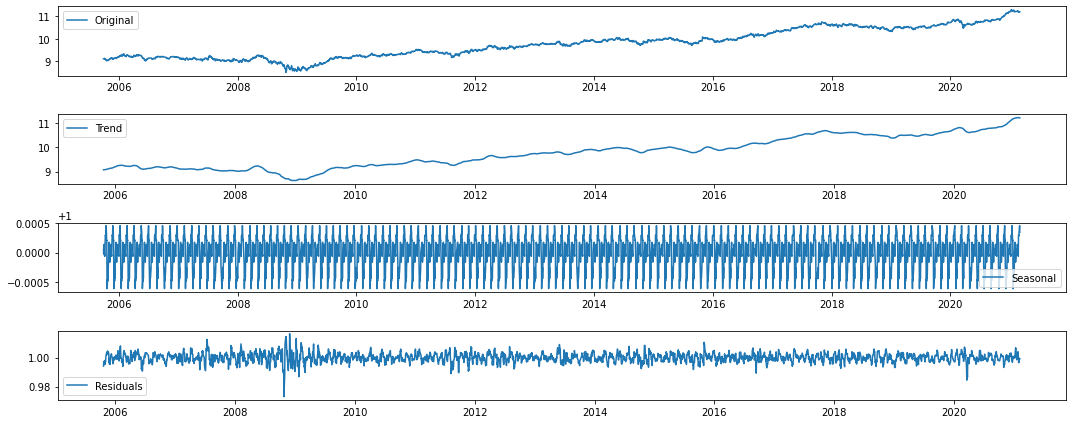

In [10]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30)  #  model='multiplicative' ???
# [[YOUR CODE]]
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams['figure.figsize'] = (15,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

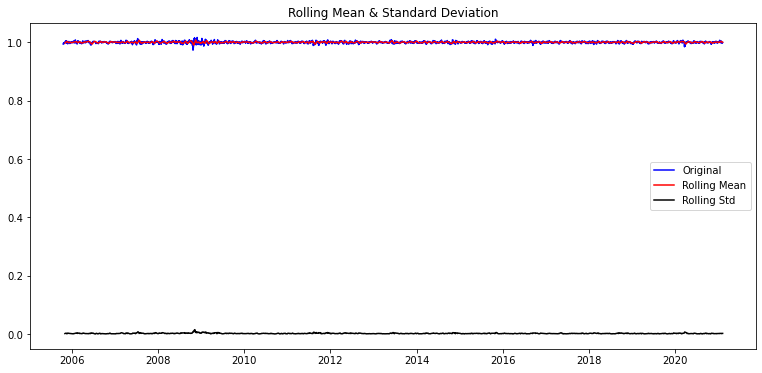

None
Results of Dickey-Fuller Test:
Test Statistic                -1.607484e+01
p-value                        5.457332e-29
#Lags Used                     2.900000e+01
Number of Observations Used    3.763000e+03
Critical Value (1%)           -3.432089e+00
Critical Value (5%)           -2.862308e+00
Critical Value (10%)          -2.567179e+00
dtype: float64


In [11]:
# Residual 안정성 확인
# [[YOUR CODE]]
plt.rcParams['figure.figsize'] = (13,6)
print(plot_rolling_statistics(residual) )

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

p-value : 0.986 -> 5.46e-29 
-> 엄청 작아짐

## STEP 4 : 학습, 테스트 데이터셋 생성

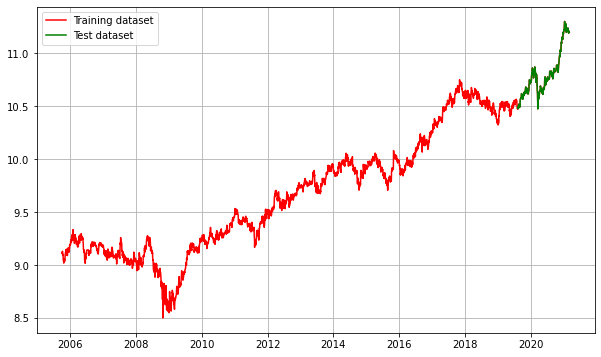

In [12]:
# [[YOUR CODE]]
train_data, test_data = ts_log[:int(len(ts_log)*0.9)],  ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='Training dataset')
plt.plot(test_data, c='g', label='Test dataset') # 겹쳐서 그림
plt.legend()

## STEP 5 : 적정 ARIMA 모수 찾기

-ACF, PACF 그려보기 -> p,q 구하기  
-차분 안정성 확인 -> d 구하기  

<function matplotlib.pyplot.show(close=None, block=None)>

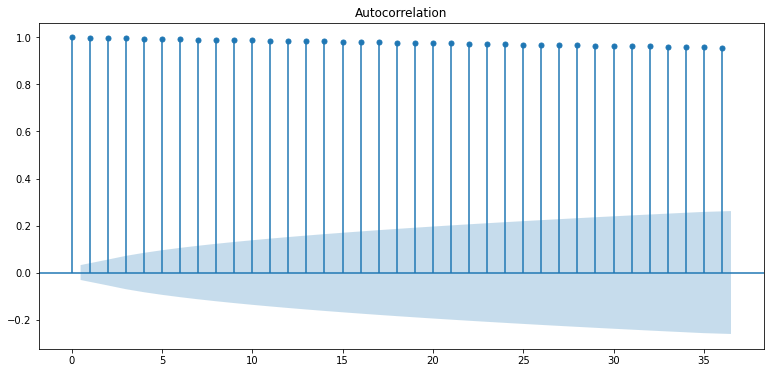

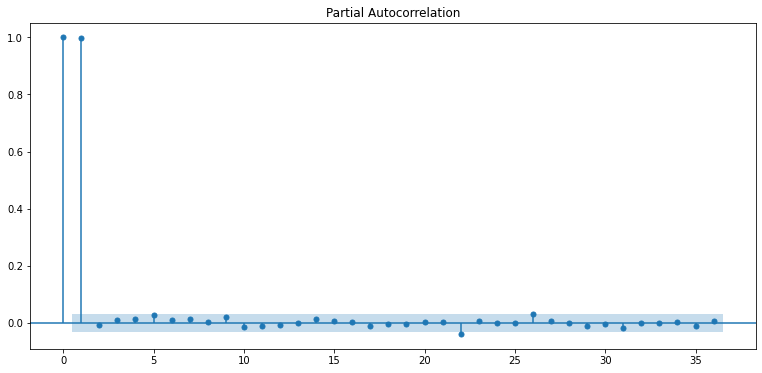

In [13]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# [[YOUR CODE]]
plot_acf(ts_log)
plot_pacf(ts_log)
plt.show

Results of Dickey-Fuller Test:
Test Statistic                  -25.058528
p-value                           0.000000
#Lags Used                        7.000000
Number of Observations Used    3814.000000
Critical Value (1%)              -3.432066
Critical Value (5%)              -2.862298
Critical Value (10%)             -2.567174
dtype: float64


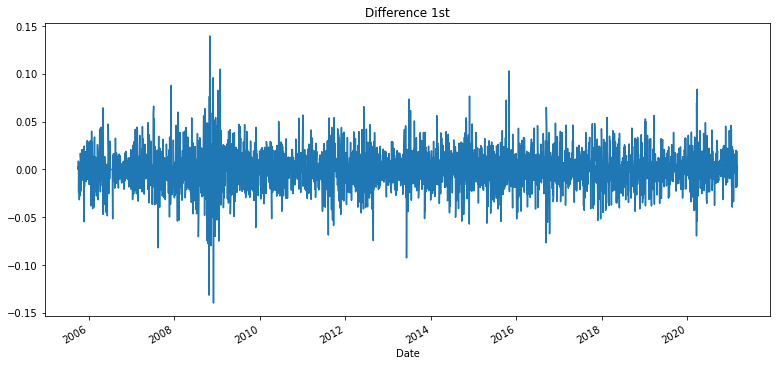

Results of Dickey-Fuller Test:
Test Statistic                  -25.058528
p-value                           0.000000
#Lags Used                        7.000000
Number of Observations Used    3814.000000
Critical Value (1%)              -3.432066
Critical Value (5%)              -2.862298
Critical Value (10%)             -2.567174
dtype: float64


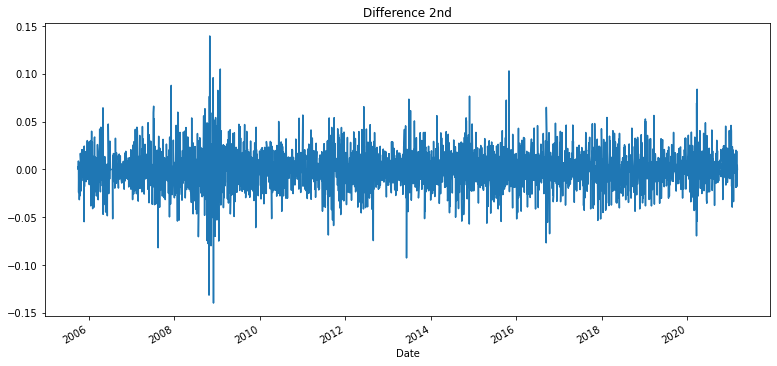

In [14]:
# 차분 안정성 확인 -> d 구하기
# [[YOUR CODE]]
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)
plt.show()

diff_2 = ts_log.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)
plt.show()

## STEP 6 : ARIMA 모델 훈련과 테스트

- ARIMA 모델 빌드와 훈련
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

In [30]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
# [[YOUR CODE]]
model = ARIMA(train_data, order=(0,2,3))
fitted_m = model.fit(disp=-1)
print(fitted_m.summary())

/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 3438
Model:                 ARIMA(0, 2, 3)   Log Likelihood                8649.731
Method:                       css-mle   S.D. of innovations              0.020
Date:                Thu, 04 Mar 2021   AIC                         -17289.462
Time:                        19:25:30   BIC                         -17258.749
Sample:                             2   HQIC                        -17278.491
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.964e-08   6.88e-07      0.130      0.896   -1.26e-06    1.44e-06
ma.L1.D2.Close    -0.9715      0.017    -56.390      0.000      -1.005      -0.938
ma.L2.D2.Close    -0.0767      0.022

<function matplotlib.pyplot.show(close=None, block=None)>

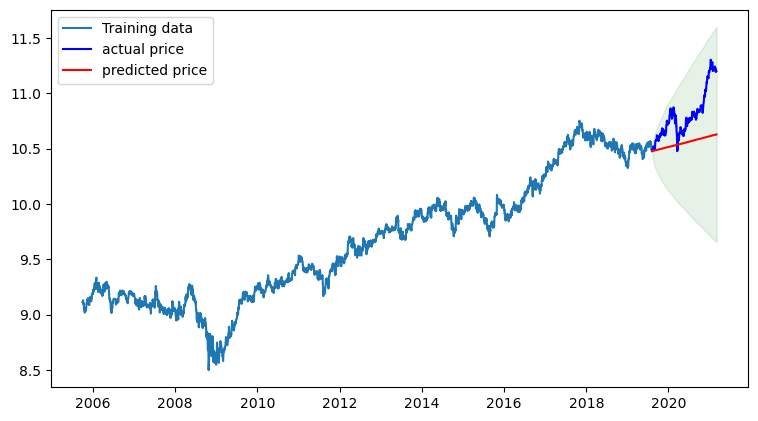

In [31]:
# Forecast : 결과가 fc에 담깁니다. 
# [[YOUR CODE]]
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)

# Make as pandas series
# [[YOUR CODE]]
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index) 

# Plot
# [[YOUR CODE]]
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='Training data')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r', label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='green', alpha=.10)
plt.legend(loc='best')
plt.show

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
 # [[YOUR CODE]]
mse = mean_squared_error(np.exp(test_data),np.exp(fc))
print('MSE: ', mse)

mae =mean_absolute_error(np.exp(test_data),np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mse)
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc)-np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  241913681.62427625
MAE:  11988.863120753795
RMSE:  15553.574560990031
MAPE: 21.16%


## STEP 7 : 다른 주식 종목 예측해 보기

관심 종목을 골라 위 STEP 1~6의 과정을 반복해 보기

# 루브릭

평가문항	상세기준
1. 시계열의 안정성이 충분히 확인되었는가?  
   플로팅과 adfuller 메소드가 모두 적절히 사용되었음  
   
   
2. ARIMA 모델 모수선택 근거를 체계적으로 제시하였는가?  
   p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시됨  
   
   
3. 예측 모델의 오차율이 기준 이하로 정확하게 나왔는가?  
   3개 이상 종목이 MAPE 10% 미만의 정확도로 예측됨  

# 보충 필요

4.1 parse_dates=True 는 date에 대해 정렬한다는 뜻 같은데, 정확히를 모르겠다  
???  
https://rfriend.tistory.com/536

4.2 rcParams -> 기본값을 변경시켜주는 ???  
https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html


4.2 window  (rolling window size랑 같은 거겠지???)  
window size, m, i.e., the number of consecutive observation per rolling window  
https://kr.mathworks.com/help/econ/rolling-window-estimation-of-state-space-models.html

5.2 autolag='AIC'???